In [357]:
#kmr project notebook four

In [411]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import time
#import json
#import requests
import quandl

In [412]:
#Import the master file to use for the assessment
master_path = "master_data_cleaned.csv"
master_df = pd.read_csv(master_path)
master_df.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-4,4/30/2016,4/28/2016,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.0,30566.0,3.5,3.88,3.66
1,2016,Apr,2016-4,4/30/2016,4/28/2016,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.0,30566.0,3.5,3.88,3.66
2,2016,Apr,2016-4,4/30/2016,4/28/2016,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.0,30566.0,3.5,3.88,3.66
3,2016,Apr,2016-4,4/30/2016,4/28/2016,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.0,30566.0,3.5,3.88,3.66
4,2016,Apr,2016-4,4/30/2016,4/28/2016,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.0,30566.0,3.5,3.88,3.66


In [413]:
# Convert the Year-Month Column data to a more useful date format
master_df['Year-Month'] = master_df['Year-Month'].apply(pd.to_datetime)
master_df['Year-Month'] = pd.to_datetime(master_df['Year-Month'], format = '%Y%B')
print(master_df["Region Name"].unique())
master_df.dtypes

['Breckenridge, CO; CO' 'Colorado Springs, CO' 'Denver, CO' 'Greeley, CO']


Year                          int64
Month                        object
Year-Month           datetime64[ns]
Date Zillow                  object
Date Interest                object
Indicator ID                 object
Indicator Name               object
Region ID                     int64
Region Type                  object
Region Name                  object
Value                       float64
County Population           float64
Unemployment Rate           float64
Wells Fargo Rate            float64
Freddie Mac Rate            float64
dtype: object

In [414]:
# ALL REGION FREDDIE MAC TABLE

date = master_df["Date Interest"]
date = date.dropna(how="any")
#print(date)

irate = master_df["Freddie Mac Rate"]
irate = irate.dropna(how="any")
#print(irate)

itrend = pd.DataFrame({"Date Interest" : date, "Freddie Mac Rate" : irate})
#itrend.to_csv("1atable_interestrate_k.csv", index=False, header=True)
#itrend.head()

rtrend = itrend.drop_duplicates(["Date Interest"])
rtrend.to_csv("1a_interestweekly_k.csv", index=False, header=True)
rtrend.head()

# Waste .... 
#rtrend = pd.dataframe(itrend.groupby(["Date Interest" , "Freddie Max Rate"]).mean()["Freddie Mac Rate"])

,Date Interest,Freddie Mac Rate
0,4/28/2016,3.66
10,5/5/2016,3.61
11,5/12/2016,3.57
12,5/19/2016,3.58
13,5/26/2016,3.64


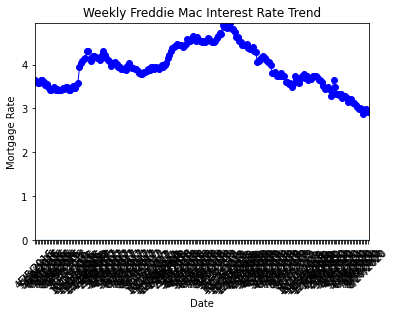

In [415]:
# Plot the WEEKLY INTEREST RATE trend using Date Interest on x-axis
#print(len(rtrend["Date Interest"].unique()))
#print(rtrend["Freddie Mac Rate"].max())
x_lim = len(rtrend["Date Interest"].unique())
#print(x_lim)
y_lim = rtrend["Freddie Mac Rate"].max()
#print(y_lim)
x_axis = rtrend["Date Interest"]
y_axis = rtrend["Freddie Mac Rate"]
plt.title("Weekly Freddie Mac Interest Rate Trend")
plt.xlabel("Date")
plt.ylabel("Mortgage Rate")
plt.xticks(rotation=45)
plt.hlines(0, 0, x_lim, alpha=0.2)
plt.xlim(0, x_lim)
plt.ylim(0, y_lim + .02)
plt.plot(x_axis, y_axis, marker="o", color="blue", linewidth=1)
plt.savefig("1achart_weeklyinterestrate_k.png")
plt.show()

In [416]:
# Build MONTHLY mortgage rate trend line based on the year-month timepoints and the interest rate date

date_ym = master_df["Year-Month"]
date_ym = date_ym.dropna(how="any")
#print(date)

irate_ym = master_df["Freddie Mac Rate"]
irate_ym = irate_ym.dropna(how="any")
#print(irate)

itrend_ym = pd.DataFrame({"Year-Month" : date_ym, "Date Interest" : date, "Freddie Mac Rate" : irate_ym})
#itrend_ym.to_csv("1ctable_interestrate_k.csv", index=False, header=True)
#itrend.head()

rtrend_ym = itrend_ym.drop_duplicates(["Year-Month"])
rtrend_ym = rtrend_ym.dropna(how="any")
rtrend_ym.to_csv("1b_interestmonthly_k.csv", index=False, header=True)
rtrend_ym.head()

,Year-Month,Date Interest,Freddie Mac Rate
0,2016-04-01,4/28/2016,3.66
10,2016-05-01,5/5/2016,3.61
50,2016-06-01,6/2/2016,3.66
100,2016-07-01,7/7/2016,3.41
140,2016-08-01,8/4/2016,3.43


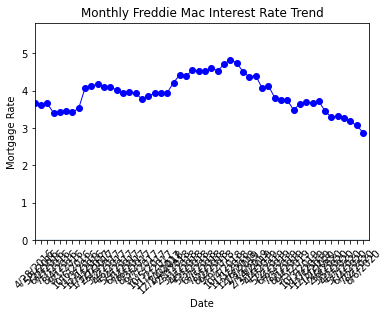

In [417]:
# Plot the MONTHLY INTEREST RATE trend using the Date Interest but on a monthly basis
#print(len(rtrend_ym["Date Interest"].unique()))
#print(rtrend_ym["Freddie Mac Rate"].max())
x_lim_ym = len(rtrend_ym["Date Interest"].unique())
#print(x_lim_ym)
y_lim_ym = rtrend_ym["Freddie Mac Rate"].max()
#print(y_lim_ym)
x_axis_ym = rtrend_ym["Date Interest"]
y_axis_ym = rtrend_ym["Freddie Mac Rate"]
plt.title("Monthly Freddie Mac Interest Rate Trend")
plt.xlabel("Date")
plt.ylabel("Mortgage Rate")
plt.xticks(rotation=45)
plt.hlines(0, 0, x_lim_ym, alpha=0.2)
plt.xlim(0, x_lim_ym)
plt.ylim(0, y_lim_ym + 1)
plt.plot(x_axis_ym, y_axis_ym, marker="o", color="blue", linewidth=1)
plt.savefig("1bchart_monthlyinterestrate_k.png")
plt.show()

In [418]:
# Build an WEEKLY unemployment rate trend line based on the Date Interest column

date = master_df["Date Interest"]
date = date.dropna(how="any")
#print(date)

erate = master_df["Unemployment Rate"]
erate = erate.dropna(how="any")
#print(erate)

etrend = pd.DataFrame({"Date Interest" : date, "Unemployment Rate" : erate})
#etrend.to_csv("1etable_unemploymentrate_k.csv", index=False, header=True)
#etrend.head()

utrend = etrend.drop_duplicates(["Date Interest"])
utrend = utrend.dropna(how="any")
utrend.to_csv("2a_unemploymentweekly_k.csv", index=False, header=True)
utrend.head()

,Date Interest,Unemployment Rate
0,4/28/2016,3.5
10,5/5/2016,3.4
11,5/12/2016,3.4
12,5/19/2016,3.4
13,5/26/2016,3.4


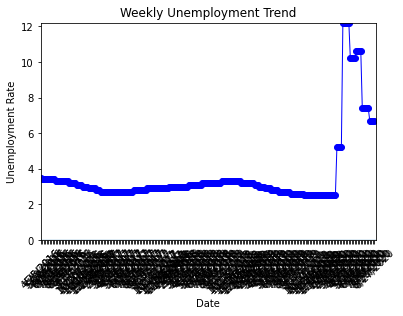

In [419]:
# Plot the WEEKLY UNEMPLOYMENT rate trend using Date Interest on x-axis
#print(len(utrend["Date Interest"].unique()))
#print(utrend["Unemployment Rate"].max())
ux_lim = len(utrend["Date Interest"].unique())
#print(ux_lim)
uy_lim = utrend["Unemployment Rate"].max()
#print(uy_lim)
ux_axis = utrend["Date Interest"]
uy_axis = utrend["Unemployment Rate"]
plt.title("Weekly Unemployment Trend")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.xticks(rotation=45)
plt.hlines(0, 0, x_lim, alpha=0.2)
plt.xlim(0, ux_lim)
plt.ylim(0, uy_lim + .02)
plt.plot(ux_axis, uy_axis, marker="o", color="blue", linewidth=1)
plt.savefig("2bchart_weeklyunemployment_k.png")
plt.show()

In [420]:
# Build WEEKLY UNEMPLOYMENT RATE trend line based on the year-month timepoints and the interest rate date

udate = master_df["Year-Month"]
udate = udate.dropna(how="any")
#print(date)

eerate = master_df["Unemployment Rate"]
eerate = eerate.dropna(how="any")
#print(eerate)

eetrend = pd.DataFrame({"Year-Month" : udate, "Date Interest" : date, "Unemployment Rate" : eerate})
#eetrend.to_csv("1gtable_unemploymentrate_k.csv", index=False, header=True)
#itrend.head()

uutrend = eetrend.drop_duplicates(["Year-Month"])
uutrend = uutrend.dropna(how="any")
uutrend.to_csv("2c_unemploymentmonthly_k.csv", index=False, header=True)
uutrend.head()

,Year-Month,Date Interest,Unemployment Rate
0,2016-04-01,4/28/2016,3.5
10,2016-05-01,5/5/2016,3.4
50,2016-06-01,6/2/2016,3.4
100,2016-07-01,7/7/2016,3.3
140,2016-08-01,8/4/2016,3.3


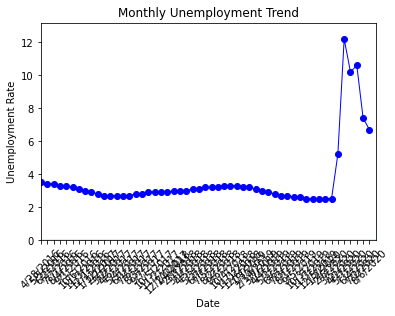

In [421]:
# Plot the MONTHLY UNEMPLOYMENT trend using the Date Interest
#print(len(uutrend["Date Interest"].unique()))
#print(uutrend["Unemployment Rate"].max())
uux_lim = len(uutrend["Date Interest"].unique())
#print(uux_lim)
uuy_lim = uutrend["Unemployment Rate"].max()
#print(uuy_lim)
uux_axis = uutrend["Date Interest"]
uuy_axis = uutrend["Unemployment Rate"]
plt.title("Monthly Unemployment Trend")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
#plt.xticks(np.arange(8,step = 5),rotation=45,)
plt.xticks(rotation=45,)
plt.hlines(0, 0, x_lim_ym, alpha=0.2)
plt.xlim(0, uux_lim)
plt.ylim(0, uuy_lim + 1)
plt.plot(uux_axis, uuy_axis, marker="o", color="blue", linewidth=1)
plt.savefig("2dchart_weeklyunemployment_k.png")
plt.show()

In [422]:
# Indicator ID work to follow ... 

In [423]:
# ALL REGION NSAM TABLE
#nsam = master_df[(master_df["Indicator ID"] == "NSAM")&(master_df["Year"] <=2019)]
nsam = master_df[(master_df["Indicator ID"] == "NSAM")]
nsam = nsam.dropna(how="any")
print(len(nsam["Value"]))
print(nsam["Region Name"].unique())
nsam.to_csv("3a_nsamallmarkets_k.csv", index=False, header=True)
nsam.head()
#days = nsam.groupby(["Year-Month", "Region Name" , "Indicator ID", "Indicator Name", "Date Zillow", "Date Interest"]).mean()["Value"]
#days.head(10)

414
['Colorado Springs, CO' 'Denver, CO' 'Greeley, CO']


,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
14284,2018,Jan,2018-01-01,1/31/2018,1/4/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394484,metro,"Colorado Springs, CO",25.0,714386.0,3.0,4.13,3.95
14285,2018,Jan,2018-01-01,1/31/2018,1/11/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394484,metro,"Colorado Springs, CO",25.0,714386.0,3.0,4.25,3.99
14286,2018,Jan,2018-01-01,1/31/2018,1/18/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394484,metro,"Colorado Springs, CO",25.0,714386.0,3.0,4.25,4.04
14287,2018,Jan,2018-01-01,1/31/2018,1/25/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394484,metro,"Colorado Springs, CO",25.0,714386.0,3.0,4.38,4.15
14732,2018,Feb,2018-02-01,2/28/2018,2/1/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394484,metro,"Colorado Springs, CO",22.0,714386.0,3.0,4.38,4.22


In [424]:
ndays = nsam["Year-Month"]
ndays = ndays.dropna(how="any")
#print(ndays)

mdays = nsam["Value"]
mdays = mdays.dropna(how="any")
#print(mdays)

ntrend = pd.DataFrame({"Year-Month" : ndays, "Date Interest" : date, "Days On Market" : mdays})
# ntrend.to_csv("12btable_mediandaystrend_k.csv", index=False, header=True)
# ntrend.head()

mtrend = ntrend.drop_duplicates(["Year-Month"])
mtrend = mtrend.dropna(how="any")
mtrend.to_csv("12c_monthlymediandaystrend_k.csv", index=False, header=True)
mtrend.head()

,Year-Month,Date Interest,Days On Market
14284,2018-01-01,1/4/2018,25.0
14732,2018-02-01,2/1/2018,22.0
15386,2018-03-01,3/1/2018,17.0
15840,2018-04-01,4/5/2018,14.0
16434,2018-05-01,5/3/2018,12.0


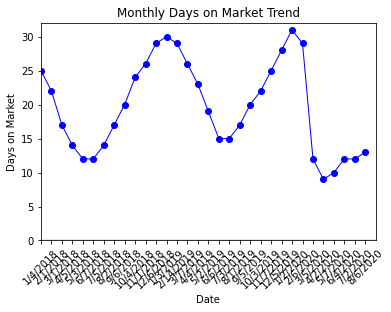

In [425]:
# Plot the MONTHLY DAYS ON MARKET trend 
#print(len(mtrend["Date Interest"].unique()))
#print(mtrend["Days On Market"].max())
daysx_lim = len(mtrend["Date Interest"].unique())
#print(daysx_lim)
daysy_lim = mtrend["Days On Market"].max()
#print(daysy_lim)
daysx_axis = mtrend["Date Interest"]
daysy_axis = mtrend["Days On Market"]
plt.title("Monthly Days on Market Trend")
plt.xlabel("Date")
plt.ylabel("Days on Market")
plt.xticks(rotation=45)
plt.hlines(0, 0, daysx_lim, alpha=0.2)
plt.xlim(0, daysx_lim)
plt.ylim(0, daysy_lim + 1)
plt.plot(daysx_axis, daysy_axis, marker="o", color="blue", linewidth=1)
plt.savefig("12chart_daysonmarkettrend_k.png")
plt.show()

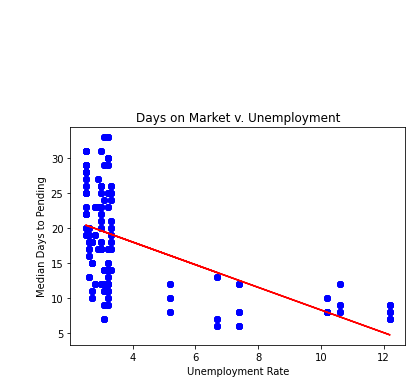

The correlation coefficient is -0.56
The line equation is as follows:  y = -1.62x + 24.48


In [426]:
#ALL REGIONS NSAM V UNEMPLOYMENT
#nsam = master_df[(master_df["Indicator ID"] == "NSAM")&(master_df["Year"] <=2019)]
nsamx_axis = nsam["Unemployment Rate"]
nsamy_axis = nsam["Value"]
plt.title("Days on Market v. Unemployment")
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(nsamx_axis, nsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nsamx_axis, nsamy_axis)
regress_values = nsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("3bchart_days2unemployment_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(nsamx_axis,nsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

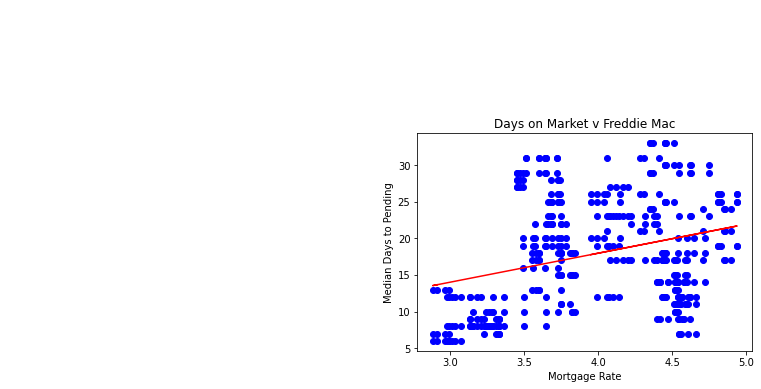

The correlation coefficient is 0.3
The line equation is as follows:  y = 3.95x + 2.17


In [427]:
# ALL REGIONS NSAM V FREDDIE
fnsamx_axis = nsam["Freddie Mac Rate"]
fnsamy_axis = nsam["Value"]
plt.title("Days on Market v Freddie Mac")
plt.xlabel("Mortgage Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(fnsamx_axis, fnsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(fnsamx_axis, fnsamy_axis)
regress_values = fnsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(fnsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("3cchart_days2freddiemac_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(fnsamx_axis,fnsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

In [428]:
# Region Specific NSAM Indicator stuff to follow ... 

In [429]:
# DENVER NSAM TABLE
den_nsam = nsam.loc[nsam["Region Name"] == "Denver, CO"]
den_nsam = den_nsam.drop_duplicates(["Year-Month"])
den_nsam.to_csv("4atable_nsamdenver_k.csv", index=False, header=True)
den_nsam.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
20782,2018,Jan,2018-01-01,1/31/2018,1/4/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394530,metro,"Denver, CO",20.0,718184.0,3.0,4.13,3.95
21150,2018,Feb,2018-02-01,2/28/2018,2/1/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394530,metro,"Denver, CO",17.0,718184.0,3.0,4.38,4.22
21684,2018,Mar,2018-03-01,3/31/2018,3/1/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394530,metro,"Denver, CO",12.0,718184.0,3.0,4.50,4.43
22058,2018,Apr,2018-04-01,4/30/2018,4/5/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394530,metro,"Denver, CO",9.0,718184.0,3.1,4.63,4.40
22552,2018,May,2018-05-01,5/31/2018,5/3/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394530,metro,"Denver, CO",7.0,718184.0,3.1,4.75,4.55


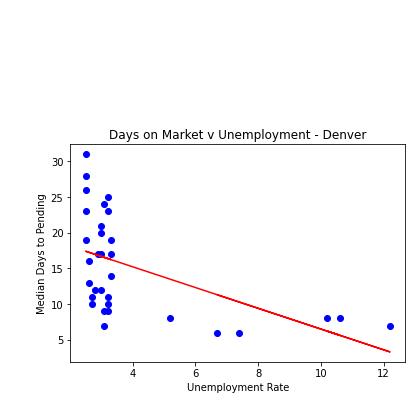

The correlation coefficient is -0.52
The line equation is as follows:  y = -1.45x + 21.05


In [430]:
# DENVER NSAM V. UNEMPLOYMENT
dnsamx_axis = den_nsam["Unemployment Rate"]
dnsamy_axis = den_nsam["Value"]
plt.title("Days on Market v Unemployment - Denver")
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(dnsamx_axis, dnsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(dnsamx_axis, dnsamy_axis)
regress_values = dnsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(dnsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("4bchart_denverdays2unemployment_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(dnsamx_axis,dnsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

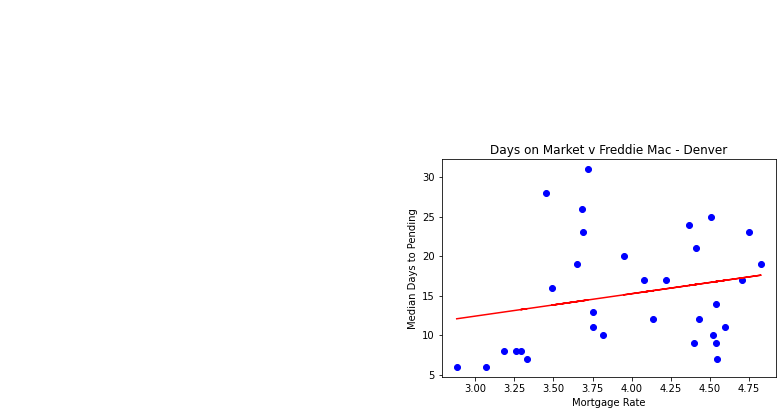

The correlation coefficient is 0.22
The line equation is as follows:  y = 2.83x + 3.94


In [431]:
# DENVER NSAM V. MORTGAGE
dfnsamx_axis = den_nsam["Freddie Mac Rate"]
dfnsamy_axis = den_nsam["Value"]
plt.title("Days on Market v Freddie Mac - Denver")
plt.xlabel("Mortgage Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(dfnsamx_axis, dfnsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(dfnsamx_axis, dfnsamy_axis)
regress_values = dfnsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(dfnsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("4cchart_denverdays2freddiemac_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(dfnsamx_axis,dfnsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

In [432]:
# SPRINGS NSAM TABLE
cos_nsam = nsam.loc[nsam["Region Name"] == "Colorado Springs, CO"]
cos_nsam = cos_nsam.drop_duplicates(["Year-Month"])
cos_nsam.to_csv("5a_nsamsprings_k.csv", index=False, header=True)
cos_nsam.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
14284,2018,Jan,2018-01-01,1/31/2018,1/4/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394484,metro,"Colorado Springs, CO",25.0,714386.0,3.0,4.13,3.95
14732,2018,Feb,2018-02-01,2/28/2018,2/1/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394484,metro,"Colorado Springs, CO",22.0,714386.0,3.0,4.38,4.22
15386,2018,Mar,2018-03-01,3/31/2018,3/1/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394484,metro,"Colorado Springs, CO",17.0,714386.0,3.0,4.50,4.43
15840,2018,Apr,2018-04-01,4/30/2018,4/5/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394484,metro,"Colorado Springs, CO",14.0,714386.0,3.1,4.63,4.40
16434,2018,May,2018-05-01,5/31/2018,5/3/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394484,metro,"Colorado Springs, CO",12.0,714386.0,3.1,4.75,4.55


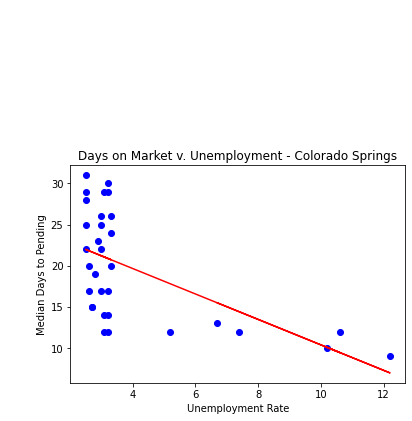

The correlation coefficient is -0.58
The line equation is as follows:  y = -1.55x + 25.86


In [433]:
# SPRINGS NSAM V. UNEMPLOYMENT
cnsamx_axis = cos_nsam["Unemployment Rate"]
cnsamy_axis = cos_nsam["Value"]
plt.title("Days on Market v. Unemployment - Colorado Springs")
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(cnsamx_axis, cnsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(cnsamx_axis, cnsamy_axis)
regress_values = dnsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(cnsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("5bchart_springsdays2unemployment_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(cnsamx_axis,cnsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

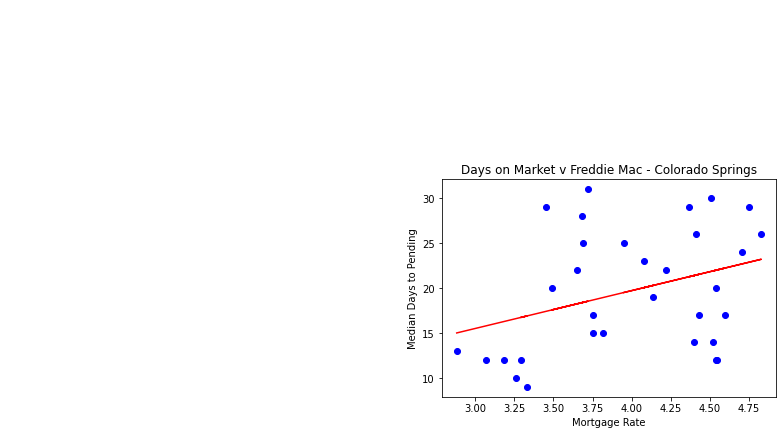

The correlation coefficient is 0.35
The line equation is as follows:  y = 4.2x + 2.9


In [434]:
# SPRINGS NSAM V. MORTGAGE
cfnsamx_axis = cos_nsam["Freddie Mac Rate"]
cfnsamy_axis = cos_nsam["Value"]
plt.title("Days on Market v Freddie Mac - Colorado Springs")
plt.xlabel("Mortgage Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(cfnsamx_axis, cfnsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(cfnsamx_axis, cfnsamy_axis)
regress_values = cfnsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(cfnsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("5cchart_springsdays2freddiemac_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(cfnsamx_axis,cfnsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

In [435]:
# GREELEY NSAM TABLE
gxy_nsam = nsam.loc[nsam["Region Name"] == "Greeley, CO"]
gxy_nsam = gxy_nsam.drop_duplicates(["Year-Month"])
gxy_nsam.to_csv("6atable_nsamgreeley_k.csv", index=False, header=True)
gxy_nsam.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
26826,2018,Jan,2018-01-01,1/31/2018,1/4/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394645,metro,"Greeley, CO",26.0,314169.0,3.0,4.13,3.95
27274,2018,Feb,2018-02-01,2/28/2018,2/1/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394645,metro,"Greeley, CO",23.0,314169.0,3.0,4.38,4.22
27928,2018,Mar,2018-03-01,3/31/2018,3/1/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394645,metro,"Greeley, CO",18.0,314169.0,3.0,4.50,4.43
28382,2018,Apr,2018-04-01,4/30/2018,4/5/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394645,metro,"Greeley, CO",14.0,314169.0,3.1,4.63,4.40
28976,2018,May,2018-05-01,5/31/2018,5/3/2018,NSAM,"Median Days to Pending (Smooth, All Homes, Mon...",394645,metro,"Greeley, CO",11.0,314169.0,3.1,4.75,4.55


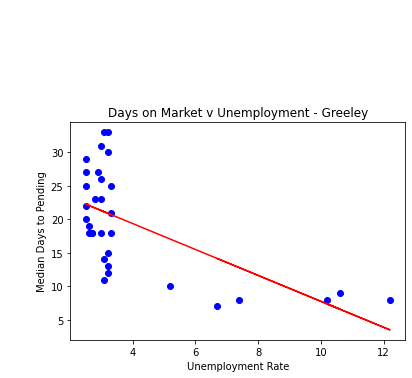

The correlation coefficient is -0.63
The line equation is as follows:  y = -1.94x + 27.11


In [436]:
# GREELEY V. UNEMPLOYMENT
gnsamx_axis = gxy_nsam["Unemployment Rate"]
gnsamy_axis = gxy_nsam["Value"]
plt.title("Days on Market v Unemployment - Greeley")
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(gnsamx_axis, gnsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(gnsamx_axis, gnsamy_axis)
regress_values = gnsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(gnsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("6bchart_greeleydays2unemployment_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(gnsamx_axis,gnsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

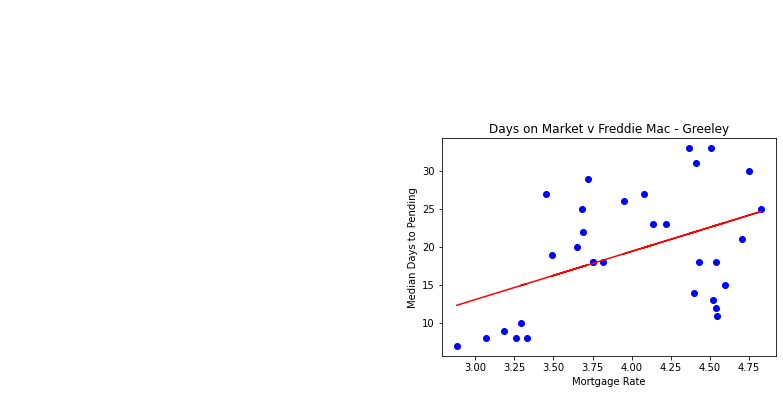

The correlation coefficient is 0.45
The line equation is as follows:  y = 6.33x + -5.88


In [437]:
# GREELEY NSAM V. MORTGAGE
gfnsamx_axis = gxy_nsam["Freddie Mac Rate"]
gfnsamy_axis = gxy_nsam["Value"]
plt.title("Days on Market v Freddie Mac - Greeley")
plt.xlabel("Mortgage Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(gfnsamx_axis, gfnsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(gfnsamx_axis, gfnsamy_axis)
regress_values = gfnsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(gfnsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("6cchart_greeleydays2freddiemac_.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(gfnsamx_axis,gfnsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

In [438]:
# CSAM Indicator Stuff to follow ... 

In [439]:
# CSAM ALL REGIONS
csam = master_df[(master_df["Indicator ID"] == "CSAM")]
csam = csam.dropna(how="any")
print(len(csam["Value"]))
print(csam["Region Name"].unique())
csam.to_csv("7atable_csamallmarkets_k.csv", index=False, header=True)
cssm.head()

414
['Colorado Springs, CO' 'Denver, CO' 'Greeley, CO']


,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
14292,2018,Jan,2018-01-01,1/31/2018,1/4/2018,CSSM,"Share of Listings With a Price Cut (Smooth, SF...",394484,metro,"Colorado Springs, CO",0.14,714386.0,3.0,4.13,3.95
14293,2018,Jan,2018-01-01,1/31/2018,1/11/2018,CSSM,"Share of Listings With a Price Cut (Smooth, SF...",394484,metro,"Colorado Springs, CO",0.14,714386.0,3.0,4.25,3.99
14294,2018,Jan,2018-01-01,1/31/2018,1/18/2018,CSSM,"Share of Listings With a Price Cut (Smooth, SF...",394484,metro,"Colorado Springs, CO",0.14,714386.0,3.0,4.25,4.04
14295,2018,Jan,2018-01-01,1/31/2018,1/25/2018,CSSM,"Share of Listings With a Price Cut (Smooth, SF...",394484,metro,"Colorado Springs, CO",0.14,714386.0,3.0,4.38,4.15
14740,2018,Feb,2018-02-01,2/28/2018,2/1/2018,CSSM,"Share of Listings With a Price Cut (Smooth, SF...",394484,metro,"Colorado Springs, CO",0.11,714386.0,3.0,4.38,4.22


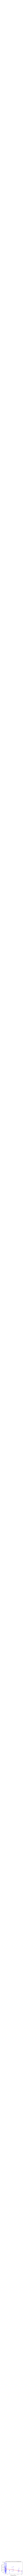

The correlation coefficient is -0.25
The line equation is as follows:  y = -0.01x + 0.18


In [440]:
# CSAM ALL REGIONS V UNEMPLOYMENT
csamx_axis = csam["Unemployment Rate"]
csamy_axis = csam["Value"]
plt.title("Share Inventory on Price Cut to Unemployment")
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(csamx_axis, csamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(csamx_axis, csamy_axis)
regress_values = csamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(csamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("7bchart_reduction2unemployment_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(csamx_axis,csamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

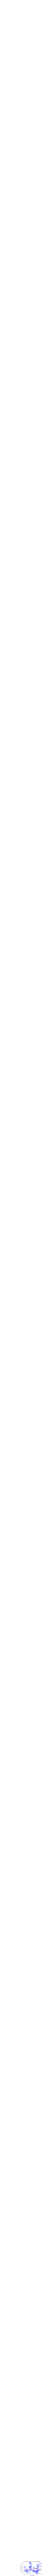

The correlation coefficient is 0.03
The line equation is as follows:  y = 0.0x + 0.15


In [441]:
# ALL REGIONS V FREDDIE
fcsamx_axis = csam["Freddie Mac Rate"]
fcsamy_axis = csam["Value"]
plt.title("Share of Inventory or Price Cut v Freddie Mac")
plt.xlabel("Mortgage Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(fcsamx_axis, fcsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(fcsamx_axis, fcsamy_axis)
regress_values = fcsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(fcsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("7cchart_reduction2freddiemac_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(fcsamx_axis,fcsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

In [442]:
# ... Covid Comparison stuff to follow

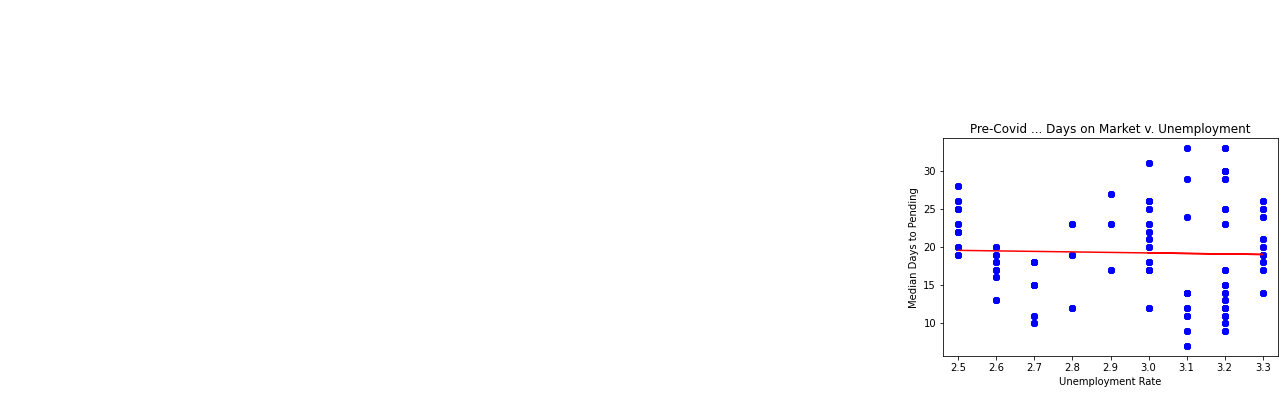

The correlation coefficient is -0.03
The line equation is as follows:  y = -0.68x + 21.26


In [447]:
# PRE-COVID - ALL REGIONS NSAM V UNEMPLOYMENT
nsam = master_df[(master_df["Indicator ID"] == "NSAM")&(master_df["Year"] <=2019)]
nsamx_axis = nsam["Unemployment Rate"]
nsamy_axis = nsam["Value"]
plt.title("Pre-Covid ... Days on Market v. Unemployment")
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(nsamx_axis, nsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nsamx_axis, nsamy_axis)
regress_values = nsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("10achart_days2unemployment_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(nsamx_axis,nsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

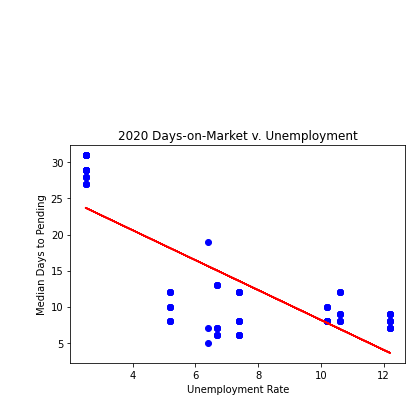

The correlation coefficient is -0.78
The line equation is as follows:  y = -2.08x + 28.89


In [451]:
# COVID - ALL REGIONS NSAM V UNEMPLOYMENT
nsam = master_df[(master_df["Indicator ID"] == "NSAM")&(master_df["Year"] >=2020)]
nsamx_axis = nsam["Unemployment Rate"]
nsamy_axis = nsam["Value"]
plt.title("2020 Days-on-Market v. Unemployment")
plt.xlabel("Unemployment Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(nsamx_axis, nsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(nsamx_axis, nsamy_axis)
regress_values = nsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(nsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("10bchart_days2unemployment_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(nsamx_axis,nsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

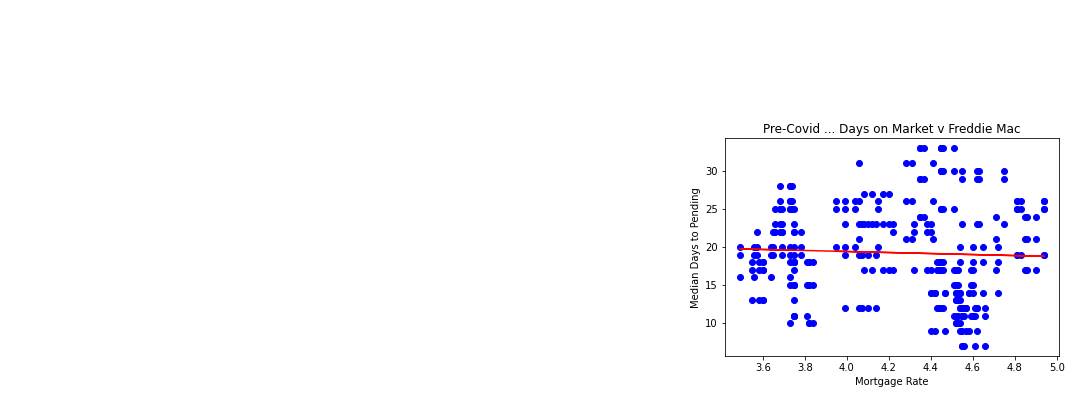

The correlation coefficient is -0.04
The line equation is as follows:  y = -0.67x + 22.09


In [448]:
# PRE-COVID ALL REGIONS NSAM V FREDDIE
nsam = master_df[(master_df["Indicator ID"] == "NSAM")&(master_df["Year"] <=2019)]
fnsamx_axis = nsam["Freddie Mac Rate"]
fnsamy_axis = nsam["Value"]
plt.title("Pre-Covid ... Days on Market v Freddie Mac")
plt.xlabel("Mortgage Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(fnsamx_axis, fnsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(fnsamx_axis, fnsamy_axis)
regress_values = fnsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(fnsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("11achart_days2freddiemac_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(fnsamx_axis,fnsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")

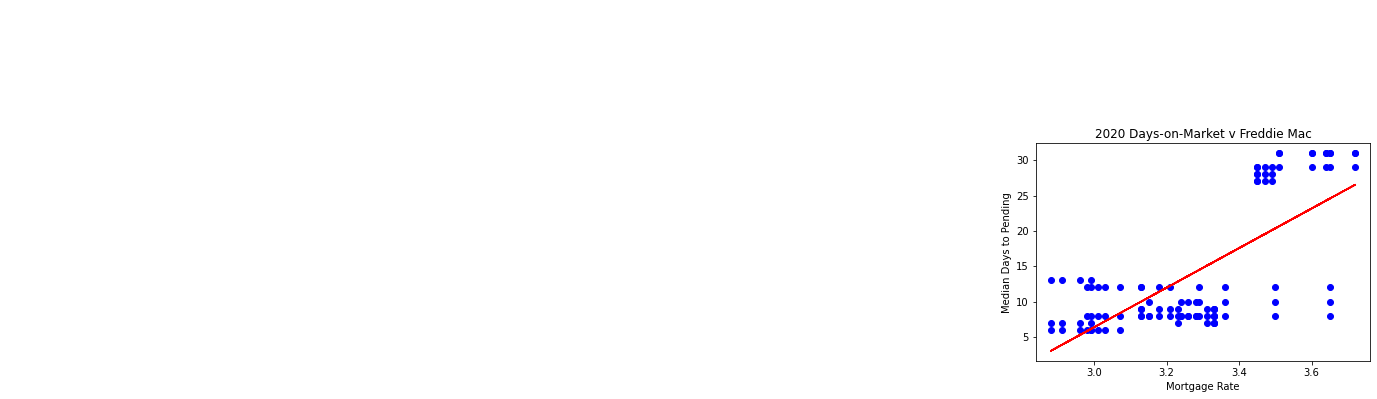

The correlation coefficient is 0.71
The line equation is as follows:  y = 28.01x + -77.64


In [449]:
# COVID ALL REGIONS NSAM V FREDDIE
nsam = master_df[(master_df["Indicator ID"] == "NSAM")&(master_df["Year"] >= 2020)]
nsam = nsam.dropna(how="any")
fnsamx_axis = nsam["Freddie Mac Rate"]
fnsamy_axis = nsam["Value"]
plt.title("2020 Days-on-Market v Freddie Mac")
plt.xlabel("Mortgage Rate")
plt.ylabel("Median Days to Pending")
plt.scatter(fnsamx_axis, fnsamy_axis, marker="o", color="blue")
(slope, intercept, rvalue, pvalue, stderr) = linregress(fnsamx_axis, fnsamy_axis)
regress_values = fnsamx_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(fnsamx_axis,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.savefig("11bchart_days2freddiemac_k.png")
plt.show()
print(f"The correlation coefficient is {round(st.pearsonr(fnsamx_axis,fnsamy_axis)[0],2)}")
print(f"The line equation is as follows:  {line_eq}")